In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [6]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python.xlsx')
data

,lag,asthma,rhinitis,whole,as_conf_min,as_conf_max,rh_conf_min,rh_conf_max,wh_conf_min,wh_conf_max
0,lag0,1.083755,1.066255,1.068338,1.048088,1.120636,1.031674,1.101997,1.034078,1.103732
1,lag1,0.965090,0.974562,0.972381,0.938670,0.992256,0.948142,1.001718,0.946411,0.999064
2,lag2,1.004735,0.992754,0.993441,0.977685,1.032536,0.966470,1.019753,0.967347,1.020238
3,lag3,1.056361,1.028176,1.032567,1.029919,1.083484,1.002962,1.054024,1.007609,1.058144
4,lag4,1.039645,1.012308,1.014969,1.016393,1.063428,0.989944,1.035176,0.992821,1.037611
5,lag5,1.053875,1.029948,1.032331,1.029530,1.078796,1.006501,1.053941,1.009162,1.056031
6,lag6,1.048368,1.025120,1.027717,1.024657,1.072629,1.002385,1.048370,1.005209,1.050728
7,lag7,1.029476,1.006024,1.008507,1.007107,1.052341,0.984477,1.028042,0.987218,1.030255


In [3]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python_after_humidity_erased.xlsx')
data

,lag,asthma,rhinitis,as_conf_min,as_conf_max,rh_conf_min,rh_conf_max
0,lag0,1.084441,1.065181,1.048305,1.121822,1.030192,1.101359
1,lag1,0.963951,0.973420,0.937339,0.991318,0.946805,1.000783
2,lag2,1.003087,0.990172,0.976158,1.030758,0.963979,1.017076
3,lag3,1.056117,1.028110,1.029530,1.083390,1.002732,1.054129
4,lag4,1.040186,1.012768,1.016808,1.064101,0.990251,1.035797
5,lag5,1.053800,1.029843,1.029399,1.078779,1.006339,1.053896
6,lag6,1.048200,1.025183,1.024359,1.072596,1.002309,1.048578
7,lag7,1.028681,1.005446,1.006226,1.051638,0.983813,1.027556


In [2]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python_after_N_changed.xlsx')
data

,lag,asthma,rhinitis,as_conf_min,as_conf_max,rh_conf_min,rh_conf_max
0,lag0,1.075568,1.058980,1.040780,1.111518,1.025192,1.093881
1,lag1,0.975038,0.985325,0.948461,1.002360,0.958720,1.012669
2,lag2,1.002705,0.992413,0.975927,1.030218,0.966404,1.019123
3,lag3,1.054715,1.030673,1.027818,1.082315,1.004916,1.057089
4,lag4,1.037552,1.011599,1.014337,1.061299,0.989157,1.034550
5,lag5,1.061573,1.038564,1.036876,1.086858,1.014707,1.062982
6,lag6,1.037193,1.018243,1.014180,1.060728,0.996061,1.040919
7,lag7,1.033589,1.011723,1.010603,1.057098,0.989523,1.034421


In [9]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_result.xlsx')
data

,lag,asthma,as_conf_min,as_conf_max
0,lag0,1.075568,1.040780,1.111518
1,lag0 - lag1,1.027700,0.995272,1.061185
2,lag0 - lag2,1.023080,0.989543,1.057754
3,lag0 - lag3,1.051102,1.016448,1.086936
4,lag0 - lag4,1.068004,1.031289,1.106027
5,lag0 - lag5,1.096283,1.057583,1.136399
6,lag0 - lag6,1.111624,1.070576,1.154245
7,lag0 - lag7,1.125606,1.081981,1.170990


In [10]:
# data['as_error'] = data['as_conf_max'] - data['asthma']
# data['rh_error'] = data['rh_conf_max'] - data['rhinitis']
# data['wh_error'] = data['wh_conf_max'] - data['whole']

In [11]:
data['as_error'] = data['as_conf_max'] - data['asthma']
# data['rh_error'] = data['rh_conf_max'] - data['rhinitis']

In [12]:
data.columns

Index(['lag', 'asthma', 'as_conf_min', 'as_conf_max', 'as_error'], dtype='object')

In [13]:
# 소수점 넷째자리에서 반올림

data = data.round(decimals=3)
data

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,1.076,1.041,1.112,0.036
1,lag0 - lag1,1.028,0.995,1.061,0.033
2,lag0 - lag2,1.023,0.990,1.058,0.035
3,lag0 - lag3,1.051,1.016,1.087,0.036
4,lag0 - lag4,1.068,1.031,1.106,0.038
5,lag0 - lag5,1.096,1.058,1.136,0.040
6,lag0 - lag6,1.112,1.071,1.154,0.043
7,lag0 - lag7,1.126,1.082,1.171,0.045


In [ ]:
# data_pivot = data.pivot(index='disease', columns='lag', values='RR').reset_index()
# # p = data_pivot.index.values
# # data_pivot.reset_index(drop = True, inplace = True)
# # data_pivot.insert(0, column="disease",value = p)
# data_pivot

In [ ]:
# # plot grouped bar chart
# data_pivot.plot(x= 'disease',
#         kind='bar',
#         stacked=False,
#         title='Grouped Bar Graph with dataframe')

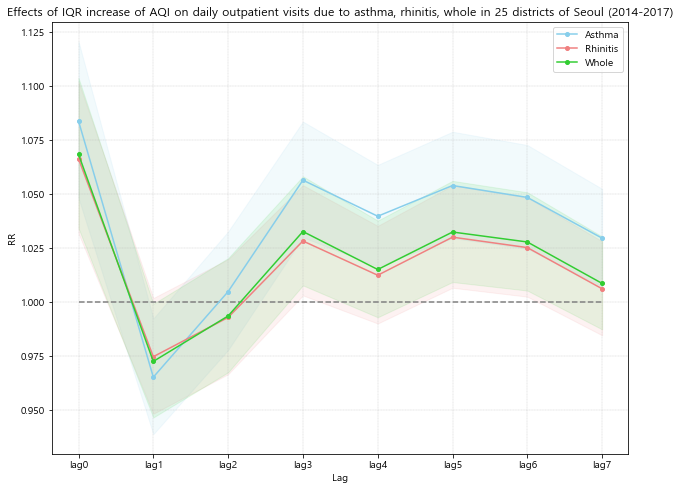

In [110]:
# Create figure and add axes object
fig = plt.figure(figsize=(8, 6)) # figure size
ax = fig.add_axes([0, 0, 1, 1])
# Plot and show our data
ax.plot(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', markersize = '4')
# plt.errorbar(data['lag'], data['asthma'], yerr = data['as_error'])
ax.plot(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', markersize = '4')
# plt.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'])
ax.plot(data['lag'], data['whole'], color = 'limegreen', marker = 'o', markersize = '4')

plt.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
plt.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
plt.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='limegreen', alpha=0.1)

plt.xlabel('Lag')
plt.ylabel('RR')
plt.title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

# plt.xticks(color='w') # for darkmode 
# plt.yticks(color='w') # for darkmode

# ax.xaxis.label.set_color('w') # for darkmode   
# ax.yaxis.label.set_color('w') # for darkmode 

plt.legend(('Asthma', 'Rhinitis', 'Whole'))
plt.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

plt.grid(linestyle = '--', linewidth = '0.3') # grid

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

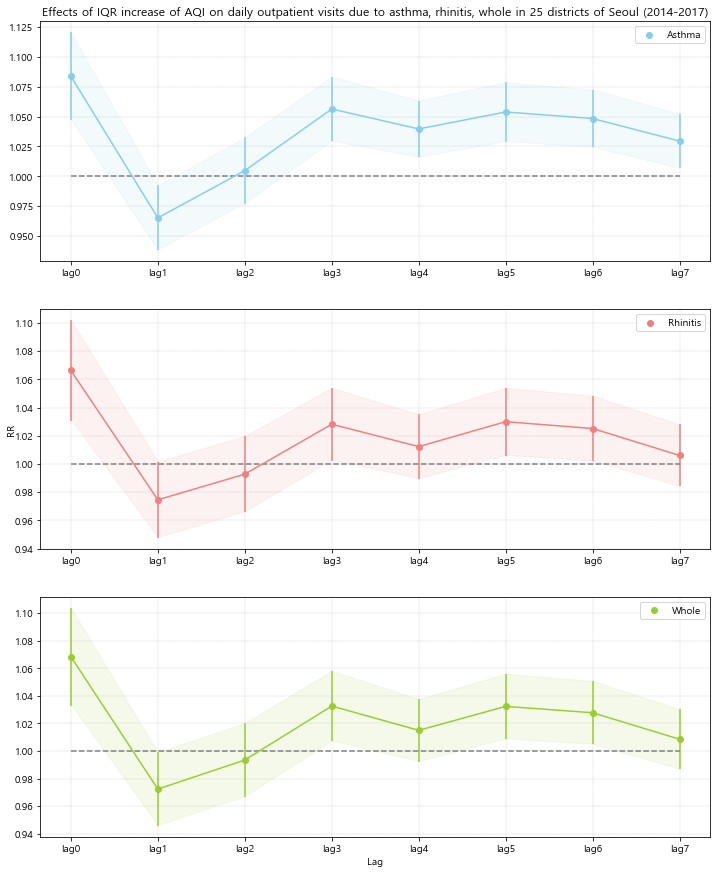

In [159]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 15)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
ax3.grid(linestyle = '--', linewidth = '0.3') # grid

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_2.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

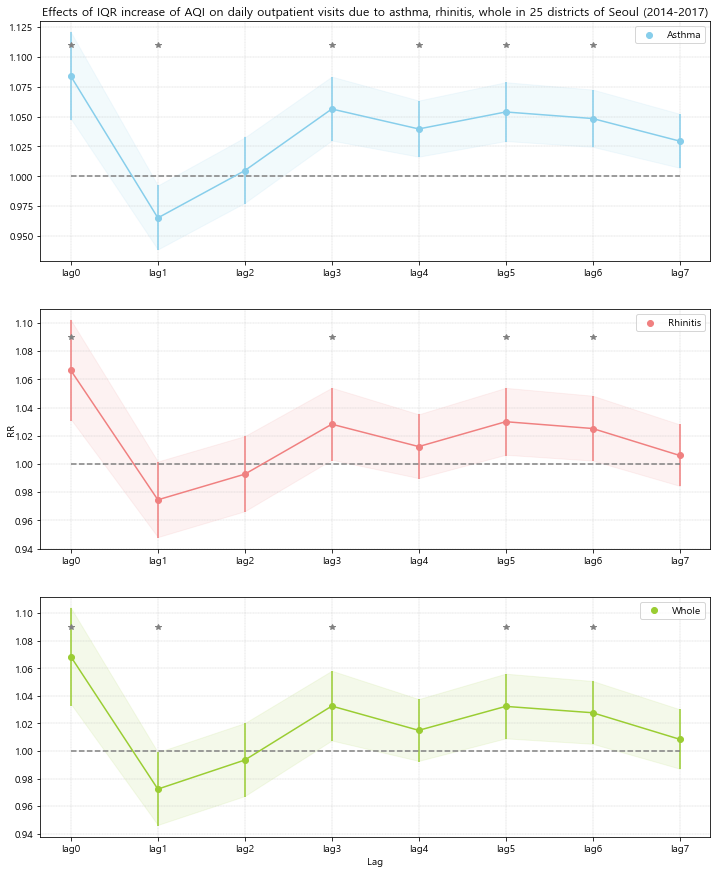

In [158]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 15)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# whole
ax3.plot(0,1.09, '*', color = 'gray')
ax3.plot(1,1.09, '*', color = 'gray')
ax3.plot(3,1.09, '*', color = 'gray')
ax3.plot(5,1.09, '*', color = 'gray')
ax3.plot(6,1.09, '*', color = 'gray')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_3_star.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

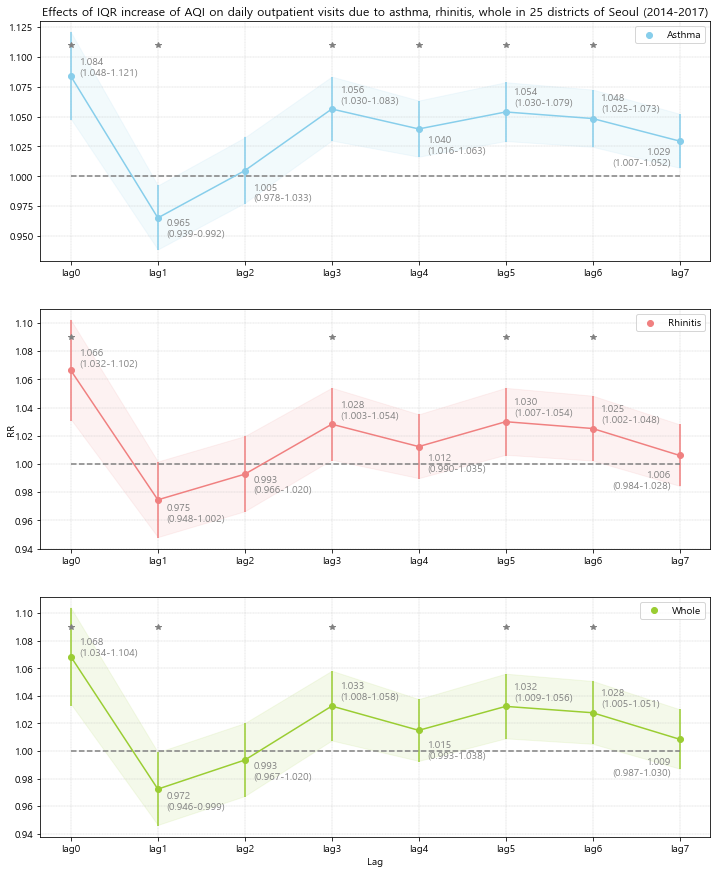

In [10]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 15)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma, rhinitis, whole in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# whole
ax3.plot(0,1.09, '*', color = 'gray')
ax3.plot(1,1.09, '*', color = 'gray')
ax3.plot(3,1.09, '*', color = 'gray')
ax3.plot(5,1.09, '*', color = 'gray')
ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.085, '1.084\n(1.048-1.121)', color = 'gray')
ax1.text(1.1,0.95, '0.965\n(0.939-0.992)', color = 'gray')
ax1.text(2.1,0.98, '1.005\n(0.978-1.033)', color = 'gray')
ax1.text(3.1,1.062, '1.056\n(1.030-1.083)', color = 'gray')
ax1.text(4.1,1.02, '1.040\n(1.016-1.063)', color = 'gray')
ax1.text(5.1,1.06, '1.054\n(1.030-1.079)', color = 'gray')
ax1.text(6.1,1.055, '1.048\n(1.025-1.073)', color = 'gray')
ax1.text(6.9,1.01, '1.029\n(1.007-1.052)', color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '1.066\n(1.032-1.102)', color = 'gray')
ax2.text(1.1,0.96, '0.975\n(0.948-1.002)', color = 'gray')
ax2.text(2.1,0.98, '0.993\n(0.966-1.020)', color = 'gray')
ax2.text(3.1,1.033, '1.028\n(1.003-1.054)', color = 'gray')
ax2.text(4.1,0.995, '1.012\n(0.990-1.035)', color = 'gray')
ax2.text(5.1,1.035, '1.030\n(1.007-1.054)', color = 'gray')
ax2.text(6.1,1.03, '1.025\n(1.002-1.048)', color = 'gray')
ax2.text(6.9,0.983, '1.006\n(0.984-1.028)', color = 'gray', horizontalalignment='right')

# whole
ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_4_value.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

after humidity < 0 erased

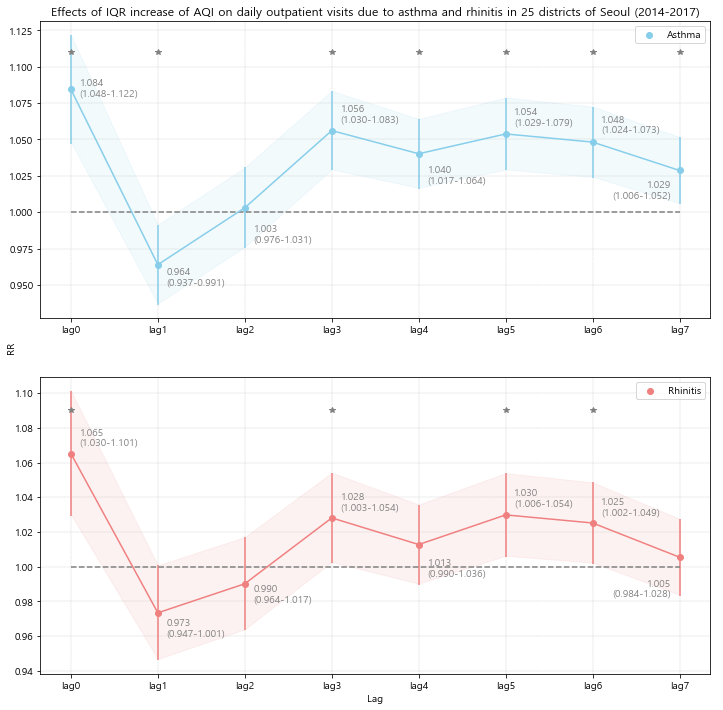

In [14]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma and rhinitis in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')
ax1.plot(7,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '1.084\n(1.048-1.122)', color = 'gray')
ax1.text(1.1,0.95, '0.964\n(0.937-0.991)', color = 'gray')
ax1.text(2.1,0.98, '1.003\n(0.976-1.031)', color = 'gray')
ax1.text(3.1,1.062, '1.056\n(1.030-1.083)', color = 'gray')
ax1.text(4.1,1.02, '1.040\n(1.017-1.064)', color = 'gray')
ax1.text(5.1,1.06, '1.054\n(1.029-1.079)', color = 'gray')
ax1.text(6.1,1.055, '1.048\n(1.024-1.073)', color = 'gray')
ax1.text(6.9,1.01, '1.029\n(1.006-1.052)', color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '1.065\n(1.030-1.101)', color = 'gray')
ax2.text(1.1,0.96, '0.973\n(0.947-1.001)', color = 'gray')
ax2.text(2.1,0.98, '0.990\n(0.964-1.017)', color = 'gray')
ax2.text(3.1,1.033, '1.028\n(1.003-1.054)', color = 'gray')
ax2.text(4.1,0.995, '1.013\n(0.990-1.036)', color = 'gray')
ax2.text(5.1,1.035, '1.030\n(1.006-1.054)', color = 'gray')
ax2.text(6.1,1.03, '1.025\n(1.002-1.049)', color = 'gray')
ax2.text(6.9,0.983, '1.005\n(0.984-1.028)', color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_5_afterhumidity.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

after N changed

In [58]:
data['asthma'][0]

1.0755677427959427

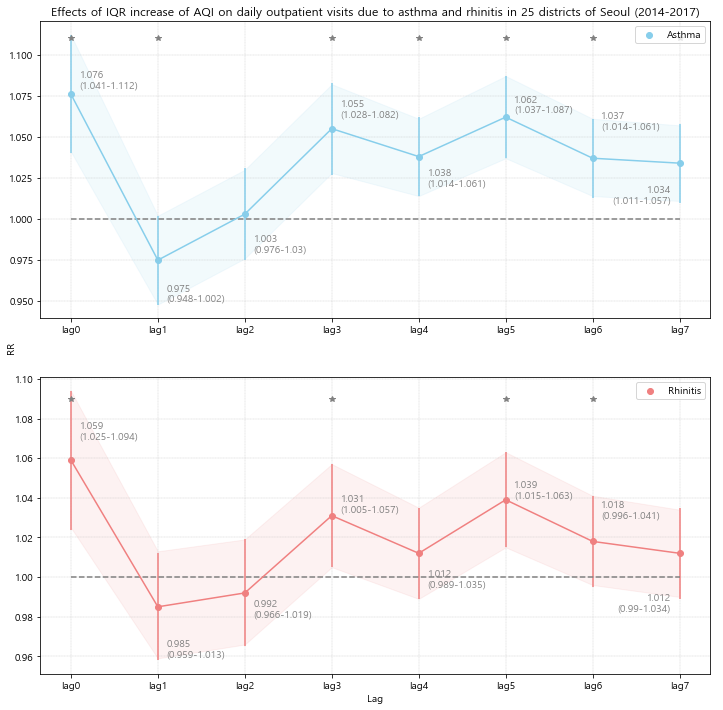

In [71]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma and rhinitis in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'gray')
ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'gray')
ax1.plot(4,1.11, '*', color = 'gray')
ax1.plot(5,1.11, '*', color = 'gray')
ax1.plot(6,1.11, '*', color = 'gray')
ax1.plot(7,1.11, '*', color = 'gray')

# rhinitis
ax2.plot(0,1.09, '*', color = 'gray')
ax2.plot(3,1.09, '*', color = 'gray')
ax2.plot(5,1.09, '*', color = 'gray')
ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.062, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.02, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.065, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.055, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

In [6]:
nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_python_after_N_changed_NonIV.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
nonIVdata['rh_error'] = nonIVdata['rh_conf_max'] - nonIVdata['rhinitis']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,lag,asthma,rhinitis,as_conf_min,as_conf_max,rh_conf_min,rh_conf_max,as_error,rh_error
0,lag0,1.017,1.030,1.009,1.025,1.022,1.038,0.008,0.008
1,lag1,0.986,0.994,0.978,0.993,0.986,1.001,0.008,0.008
2,lag2,0.999,1.003,0.991,1.007,0.995,1.010,0.008,0.008
3,lag3,0.999,1.005,0.992,1.007,0.997,1.012,0.007,0.007
4,lag4,1.009,1.013,1.002,1.016,1.006,1.020,0.007,0.007
5,lag5,1.009,1.014,1.001,1.016,1.007,1.021,0.007,0.007
6,lag6,1.006,1.013,0.998,1.013,1.006,1.020,0.007,0.007
7,lag7,1.004,1.009,0.997,1.011,1.002,1.016,0.007,0.007


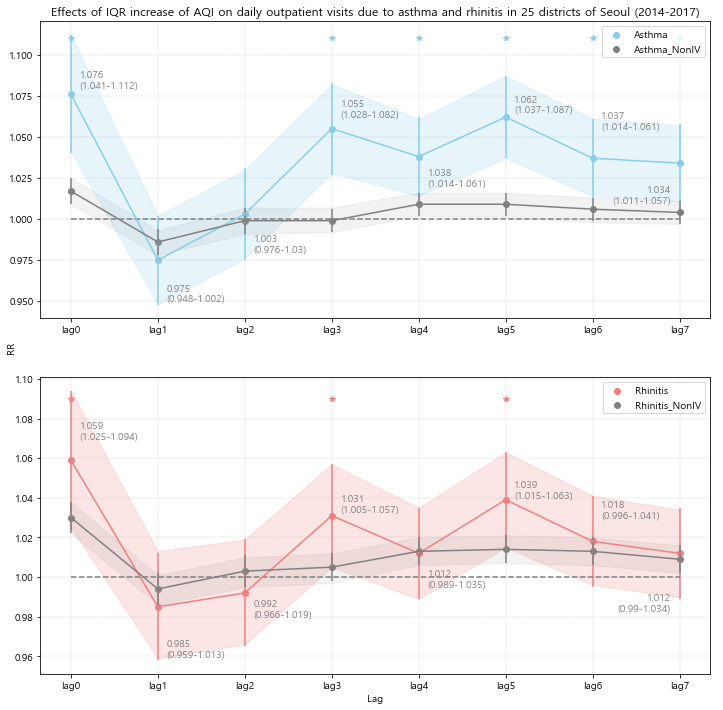

In [84]:
# Create figure and add axes object
fig = plt.figure(figsize=(12, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma_NonIV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
ax2.legend(loc="upper right")

ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma and rhinitis in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
ax2.plot(0,1.09, '*', color = 'lightcoral')
ax2.plot(3,1.09, '*', color = 'lightcoral')
ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.062, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.02, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.065, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.055, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# rhinitis
ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

asthma만 다시 그리기

<ipython-input-7-a9a90b7f1657>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(1, 1, 1)


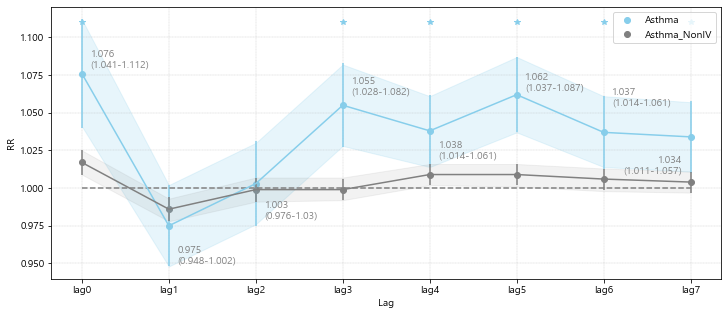

In [7]:
# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'skyblue', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'skyblue')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma_NonIV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='skyblue', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
# ax.set_title('Effects of IQR increase of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.11, '*', color = 'skyblue')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.11, '*', color = 'skyblue')
ax1.plot(4,1.11, '*', color = 'skyblue')
ax1.plot(5,1.11, '*', color = 'skyblue')
ax1.plot(6,1.11, '*', color = 'skyblue')
ax1.plot(7,1.11, '*', color = 'skyblue')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,0.95, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,0.98, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.062, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.02, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.065, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.055, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\main_result_6_afterNchanged_withNonIVs_onlyasthma.pdf', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

### 0908 moving average 추가

In [8]:
nonIVdata = pd.read_excel('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_NonIV.xlsx')
nonIVdata['as_error'] = nonIVdata['as_conf_max'] - nonIVdata['asthma']
nonIVdata = nonIVdata.round(decimals=3)
nonIVdata

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0,1.017,1.009,1.025,0.008
1,lag0 - lag1,1.001,0.992,1.010,0.009
2,lag0 - lag2,1.000,0.990,1.010,0.010
3,lag0 - lag3,0.999,0.988,1.010,0.011
4,lag0 - lag4,1.004,0.992,1.016,0.012
5,lag0 - lag5,1.008,0.995,1.020,0.013
6,lag0 - lag6,1.010,0.997,1.023,0.013
7,lag0 - lag7,1.011,0.998,1.025,0.014


<ipython-input-37-81369ffbde62>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(1, 1, 1)


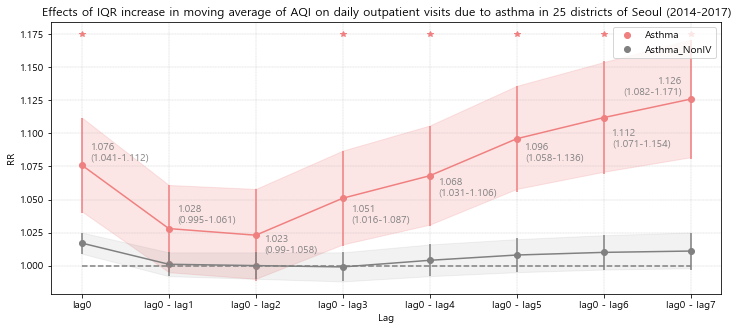

In [37]:
# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma_NonIV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(2,1.175, '*', color = 'lightcoral')
# ax1.plot(1,1.11, '*', color = 'gray')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.033, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.01, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.033, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.053, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.08, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(6.1,1.09, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray')
ax1.text(6.9,1.13, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV.png', facecolor = 'w', bbox_inches = "tight") # save

plt.show()

#### lag0 없는 버전

In [15]:
data.drop(0, axis = 0, inplace = True)
data.reset_index(drop = True, inplace = True)
data

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0 - lag1,1.028,0.995,1.061,0.033
1,lag0 - lag2,1.023,0.990,1.058,0.035
2,lag0 - lag3,1.051,1.016,1.087,0.036
3,lag0 - lag4,1.068,1.031,1.106,0.038
4,lag0 - lag5,1.096,1.058,1.136,0.040
5,lag0 - lag6,1.112,1.071,1.154,0.043
6,lag0 - lag7,1.126,1.082,1.171,0.045


In [16]:
nonIVdata.drop(0, axis = 0, inplace = True)
nonIVdata.reset_index(drop = True, inplace = True)
nonIVdata

,lag,asthma,as_conf_min,as_conf_max,as_error
0,lag0 - lag1,1.001,0.992,1.010,0.009
1,lag0 - lag2,1.000,0.990,1.010,0.010
2,lag0 - lag3,0.999,0.988,1.010,0.011
3,lag0 - lag4,1.004,0.992,1.016,0.012
4,lag0 - lag5,1.008,0.995,1.020,0.013
5,lag0 - lag6,1.010,0.997,1.023,0.013
6,lag0 - lag7,1.011,0.998,1.025,0.014


<ipython-input-17-2195c8ad5244>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(1, 1, 1)


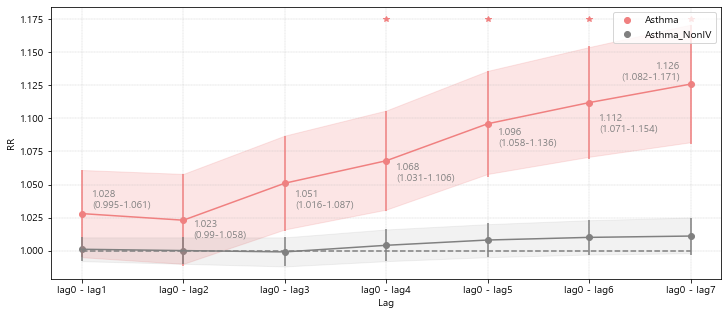

In [17]:
# Create figure and add axes object
fig = plt.figure(figsize=(12,5)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)
# Turn off axis lines and ticks of the big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1 = fig.add_subplot(1, 1, 1)
# ax2 = fig.add_subplot(2, 1, 2)
# ax3 = fig.add_subplot(3, 1, 3)

# Plot and show our data
ax1.scatter(data['lag'], data['asthma'], color = 'lightcoral', marker = 'o', label = 'Asthma')
ax1.errorbar(data['lag'], data['asthma'], yerr = data['as_error'], color = 'lightcoral')
ax1.legend(loc="upper right")

ax1.scatter(nonIVdata['lag'], nonIVdata['asthma'], color = 'gray', marker = 'o', label = 'Asthma_NonIV')
ax1.errorbar(nonIVdata['lag'], nonIVdata['asthma'], yerr = nonIVdata['as_error'], color = 'gray')
ax1.legend(loc="upper right")

# ax2.scatter(data['lag'], data['rhinitis'], color = 'lightcoral', marker = 'o', label = 'Rhinitis')
# ax2.errorbar(data['lag'], data['rhinitis'], yerr = data['rh_error'], color = 'lightcoral')
# ax2.legend(loc="upper right")

# ax2.scatter(nonIVdata['lag'], nonIVdata['rhinitis'], color = 'gray', marker = 'o', label = 'Rhinitis_NonIV')
# ax2.errorbar(nonIVdata['lag'], nonIVdata['rhinitis'], yerr = nonIVdata['rh_error'], color = 'gray')
# ax2.legend(loc="upper right")

# ax3.scatter(data['lag'], data['whole'], color = 'yellowgreen', marker = 'o', label = 'Whole')
# ax3.errorbar(data['lag'], data['whole'], yerr = data['wh_error'], color = 'yellowgreen')
# ax3.legend(loc="upper right")

ax1.fill_between(data['lag'], data['as_conf_min'], data['as_conf_max'], color='lightcoral', alpha=0.2)
ax1.fill_between(nonIVdata['lag'], nonIVdata['as_conf_min'], nonIVdata['as_conf_max'], color='gray', alpha=0.1)
# ax2.fill_between(data['lag'], data['rh_conf_min'], data['rh_conf_max'], color='lightcoral', alpha=0.2)
# ax2.fill_between(nonIVdata['lag'], nonIVdata['rh_conf_min'], nonIVdata['rh_conf_max'], color='gray', alpha=0.1)
# ax3.fill_between(data['lag'], data['wh_conf_min'], data['wh_conf_max'], color='yellowgreen', alpha=0.1)

ax.set_xlabel('Lag')
ax.set_ylabel('RR')
# ax.set_title('Effects of IQR increase in moving average of AQI on daily outpatient visits due to asthma in 25 districts of Seoul (2014-2017)')

ax1.hlines(1,0,6, color="gray", linestyles='--')  # RR = 1 line
# ax2.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line
# ax3.hlines(1,0,7, color="gray", linestyles='--')  # RR = 1 line

ax1.grid(linestyle = '--', linewidth = '0.3') # grid
# ax2.grid(linestyle = '--', linewidth = '0.3') # grid
# ax3.grid(linestyle = '--', linewidth = '0.3') # grid

# 유의한 값 표시
# asthma
# ax1.plot(0,1.175, '*', color = 'lightcoral')
# ax1.plot(2,1.175, '*', color = 'lightcoral')
ax1.plot(3,1.175, '*', color = 'lightcoral')
ax1.plot(4,1.175, '*', color = 'lightcoral')
ax1.plot(5,1.175, '*', color = 'lightcoral')
ax1.plot(6,1.175, '*', color = 'lightcoral')
# ax1.plot(7,1.175, '*', color = 'lightcoral')

# rhinitis
# ax2.plot(0,1.09, '*', color = 'lightcoral')
# ax2.plot(3,1.09, '*', color = 'lightcoral')
# ax2.plot(5,1.09, '*', color = 'lightcoral')
# ax2.plot(6,1.09, '*', color = 'gray')

# # whole
# ax3.plot(0,1.09, '*', color = 'gray')
# ax3.plot(1,1.09, '*', color = 'gray')
# ax3.plot(3,1.09, '*', color = 'gray')
# ax3.plot(5,1.09, '*', color = 'gray')
# ax3.plot(6,1.09, '*', color = 'gray')

# value 표시
# asthma
# ax1.text(0.1,1.08, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(0.1,1.033, '{}\n({}-{})'.format(data['asthma'][0], data['as_conf_min'][0], data['as_conf_max'][0]), color = 'gray')
ax1.text(1.1,1.01, '{}\n({}-{})'.format(data['asthma'][1], data['as_conf_min'][1], data['as_conf_max'][1]), color = 'gray')
ax1.text(2.1,1.033, '{}\n({}-{})'.format(data['asthma'][2], data['as_conf_min'][2], data['as_conf_max'][2]), color = 'gray')
ax1.text(3.1,1.053, '{}\n({}-{})'.format(data['asthma'][3], data['as_conf_min'][3], data['as_conf_max'][3]), color = 'gray')
ax1.text(4.1,1.08, '{}\n({}-{})'.format(data['asthma'][4], data['as_conf_min'][4], data['as_conf_max'][4]), color = 'gray')
ax1.text(5.1,1.09, '{}\n({}-{})'.format(data['asthma'][5], data['as_conf_min'][5], data['as_conf_max'][5]), color = 'gray')
ax1.text(5.9,1.13, '{}\n({}-{})'.format(data['asthma'][6], data['as_conf_min'][6], data['as_conf_max'][6]), color = 'gray', horizontalalignment='right')
# ax1.text(6.9,1.01, '{}\n({}-{})'.format(data['asthma'][7], data['as_conf_min'][7], data['as_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # rhinitis
# ax2.text(0.1,1.07, '{}\n({}-{})'.format(data['rhinitis'][0], data['rh_conf_min'][0], data['rh_conf_max'][0]), color = 'gray')
# ax2.text(1.1,0.96, '{}\n({}-{})'.format(data['rhinitis'][1], data['rh_conf_min'][1], data['rh_conf_max'][1]), color = 'gray')
# ax2.text(2.1,0.98, '{}\n({}-{})'.format(data['rhinitis'][2], data['rh_conf_min'][2], data['rh_conf_max'][2]), color = 'gray')
# ax2.text(3.1,1.033, '{}\n({}-{})'.format(data['rhinitis'][3], data['rh_conf_min'][3], data['rh_conf_max'][3]), color = 'gray')
# ax2.text(4.1,0.995, '{}\n({}-{})'.format(data['rhinitis'][4], data['rh_conf_min'][4], data['rh_conf_max'][4]), color = 'gray')
# ax2.text(5.1,1.04, '{}\n({}-{})'.format(data['rhinitis'][5], data['rh_conf_min'][5], data['rh_conf_max'][5]), color = 'gray')
# ax2.text(6.1,1.03, '{}\n({}-{})'.format(data['rhinitis'][6], data['rh_conf_min'][6], data['rh_conf_max'][6]), color = 'gray')
# ax2.text(6.9,0.983, '{}\n({}-{})'.format(data['rhinitis'][7], data['rh_conf_min'][7], data['rh_conf_max'][7]), color = 'gray', horizontalalignment='right')

# # whole
# ax3.text(0.1,1.07, '1.068\n(1.034-1.104)', color = 'gray')
# ax3.text(1.1,0.958, '0.972\n(0.946-0.999)', color = 'gray')
# ax3.text(2.1,0.98, '0.993\n(0.967-1.020)', color = 'gray')
# ax3.text(3.1,1.038, '1.033\n(1.008-1.058)', color = 'gray')
# ax3.text(4.1,0.995, '1.015\n(0.993-1.038)', color = 'gray')
# ax3.text(5.1,1.037, '1.032\n(1.009-1.056)', color = 'gray')
# ax3.text(6.1,1.033, '1.028\n(1.005-1.051)', color = 'gray')
# ax3.text(6.9,0.983, '1.009\n(0.987-1.030)', color = 'gray', horizontalalignment='right')

# plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV_withoutlag0.png', facecolor = 'w', bbox_inches = "tight") # save
plt.savefig('D:\\SNUlab\\1. Results\\Thermal Inversion\\figures\\moving_average_results_withNonIV_withoutlag0.pdf', facecolor = 'w', bbox_inches = "tight") # save

plt.show()